<h1>Geometrical algorithms</h1>

<h1> Basics </h1>

<ul>

<li>Point: $(x,y)$</li>

<li>Line: $ax + b =y$</li>

<li>Line segment: Two points</li>

<li>Polygon: Sequence of points.</li>
</ul>

<h2> Points and Line Segments</h2>

What is the length of a line segment $S_i$?

In [9]:
import numpy as np
import math
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [28]:
def length_segment(p1,p2):
    return ((p2[0]-p1[0])**2+(p2[1]-p1[1])**2)**.5

P1 = [0.,0.]
P2 = [3.,4.]
print 'Length(P1,P2) = ', length_segment(P1, P2)
#np.linalg.norm([P1, P2])

Length(P1,P2) =  5.0


What is the midpoint of a line segment $S_i$?

In [29]:
def midpoint_segment(p1,p2):
    return [(p1[0]+p2[0])/2, (p1[1]+p2[1])/2]

P3 = [2.,-1.]
P4 = [-1.,5.]
print 'Length(P1,P2) = ', midpoint_segment(P3, P4)

Length(P1,P2) =  [0.5, 2.0]


What is the intersection between two line segments $S_i$ and $S_j$?

Is a given point $P$ contained in the line segment $S$?

CCW. Given three points a, b, and c, are the segments $\bar{ab}$, $\bar{bc}$ a counterclockwise turn?

<h3>Cross product</h3>

Consider vectors $p_1$ and $p_2$, cross product can be interpreted as the area of the parallelogram formed by the points $(0,0)$, $p_1$, $p_2$, and $p_1 + p_2$. An equivalent defintion of cross product is a determinant:

\begin{align}
p_1 \times p2 & = &det(\begin{matrix}x_1 & x_2\\ y_1 & y_2\end{matrix})\\
  & = &x_1y_2 - x_2y_1\\
  & = &-p_2\times p_1
\end{align}

<ul>
<li>If $p_1\times p_2 > 0$, then $ p_1$ is clockwise from $p_2$ respect to the origin $(0,0)$</li>
<li>If $p_1\times p_2 < 0$, then $ p_1$ is counterclockwise from $p_2$ respect to the origin $(0,0)$</li>
<li>If $p_1\times p_2 = 0$, then $ p_1$ and $p_2$ are colinear</li>
</ul>

To determine if a directed segment $\bar{p_0p_1}$ is closer to a directed segment $\bar{p_0p2}$ in a clockwise direction we use $p_0$ as the origin. i.e. $p_1-p_0$, $p_2-p_0$, hence the cross product can be computed as

$$ (p_1 - p_0) \times (p_2 - p_0) = (x_1-x_0)(y_1-y0) \times (x_2-x_0)(y_2-y0)$$

To determine whether two consecutive line segments $\bar{p_0 p_1}$ and $\bar{p_1 p_2}$ turn counterclockwise at point $p_1$ or not, we simply check whether directed segment $\bar{p_0 p_2}$ is clockwise or counterclockwise relative to directed segment $\bar{p_0 p_1}$. To do so, we compute the cross product $\bar{p_2 p_0} \times \bar{p_1 p_0}$. If the sign of this cross product is negative, then $\bar{p_0p_2}$ is counterclockwise with respect to $\bar{p_0 p_1}$ and thus we make a left turn at $p_1$. A positive cross product indicates a clockwise orientation and a right turn. A cross product of $0$ means that points $p_0$ , $p_1$ , and $p_2$ are colinear.


In [5]:
def ccw2(p0, p1, p2):
    area = (p2[0]-p0[0])*(p1[1]-p0[1]) - (p1[0]-p0[0])*(p2[1]-p0[1])
    if area < 0: return -1 #counterclockwise
    elif area > 0: return 1 #clockwise
    elif area == 0:  return  0 #collinear

In [6]:
P1 = [0.,0.]
P2 = [3.,4.]
P3 = [2.,-1.]
P4 = [-1.,5.]
print ccw2(P1,P2,P4), ccw2(P1,P2,P3), ccw2([0,0],[1,1],[2,2])

-1 1 0


In [2]:
def ccw(p0, p1, p2):
    area = (p1[0]-p0[0])*(p2[1]-p0[1]) - (p1[1]-p0[1])*(p2[0]-p0[0])
    if area < 0: return -1 #clockwise
    elif area > 0: return 1 #counterclockwise
    elif area == 0:  return  0 #collinear

In [4]:
P1 = [0.,0.]
P2 = [3.,4.]
P3 = [2.,-1.]
P4 = [-1.,5.]
print ccw(P1,P2,P4), ccw(P1,P2,P3), ccw([0,0],[1,1],[2,2])

1 -1 0


In [45]:
print P1,P2
print np.arange(P1[0],P2[0],.1).shape
print np.arange(P1[1],P2[1],.1).shape

[0.0, 0.0] [3.0, 4.0]
(30,)
(40,)


(-2.0, 6)

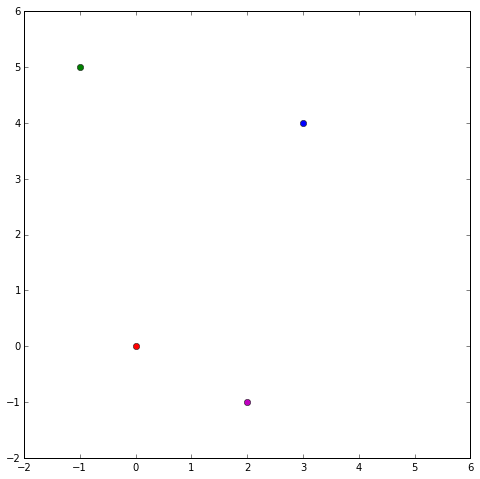

In [50]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(P1[0],P1[1],'ro')
plt.plot(P2[0],P2[1],'bo')
plt.plot(P3[0],P3[1],'mo')
plt.plot(P4[0],P4[1],'go')
plt.xlim(-2., 6)
plt.ylim(-2., 6)

In [51]:
from sympy.geometry import *

In [52]:
P1 = Point(0, 0)
P2 = Point(3, 4)
P3 = Point(2, -1)
P4 = Point(-1, 5)
S1 = Segment(P1, P2)
S2 = Segment(P3, P4)

In [26]:
print Point.is_collinear(P1, P2, P3)
print S1.length
print S2.midpoint
print S1.slope
print S1.intersection(S2)
print Segment.angle_between(S1, S2)
print S1.contains(P3)

False
5
Point(1/2, 2)
4/3
[Point(9/10, 6/5)]
acos(-sqrt(5)/5)
False


<h2>Lines</h2>

What is the distance from a point $P$ to the line $L$?

What is an ortogonal line $L_i$ which intersect $L_j$ at an arbitrary point?

What is a line $L_i$ parallel to $L_j$ with a distance $d$?

In [27]:
L1 = Line(P1, P2)
L2 = L1.perpendicular_line(P3)        # perpendicular line to L1
print L2.arbitrary_point()            # parametric equation of L2
print L2.equation()                   # algebraic equation of L2
print L2.contains(P4)                 # is P4 in L2?
print L2.distance(P4)                 # distance from P4 to L2
print L1.is_parallel(S2)              # is S2 parallel to L1?


Point(4*t + 2, -3*t - 1)
3*x + 4*y - 2
False
3
False


<h2>Polygons</h2>

Jordan curve theorem (Veblen, 1905): Any continous simple closed curve cuts the plane in exactly two pieces: the inside and the outside.

Activities:
1. Draw polygons.
2. Is a point inside a polygon?

<h1>Convex Hull</h1>

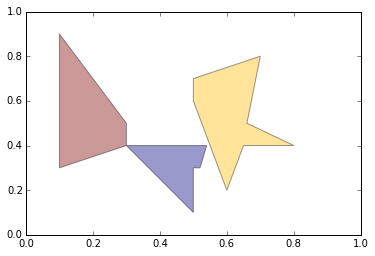

In [69]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig, ax = plt.subplots()
patches = []

polygon = Polygon([[0.1,0.9],[0.1,0.3],[0.3,0.4],[0.3,0.5]], True)
patches.append(polygon)
polygon = Polygon([[0.5,0.1],[0.5,0.3],[0.52,0.3],[0.54,0.4],[0.3,0.4]], True)
patches.append(polygon)
polygon = Polygon([[0.5,0.6],[0.5,0.7],[0.7,0.8],[0.66,0.5],[0.8,0.4],[0.65,0.4],[0.6,0.2]], True)
patches.append(polygon)

p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)

colors = 100*np.random.rand(len(patches))
p.set_array(np.array(colors))

ax.add_collection(p)

plt.show()

A set of points $P\subseteq Q$ is convex hull if for any two points $p_0$ and $q_0 \in Q$ in the set, the line segment $\overline{p_0p_1}$ is completely in the polygon defined by $P$. We implicitly assume that all points in the set $Q$ are unique and that $Q$ contains at least three points which are not colinear.

<b>The mechanical approach:</b> Using a rubber band around the points

<h2>A naïve approach</h2>

Hit 1: Edges of convex hull of $Q$ connect pairs of points in $Q$.

Hit 2: $p_i,p_j$ is on convex hull if all other points are counterclockwise of $\overline{p_ip_j}$

$\forall \: p_i, p_j \in Q: p_i \neq p_j$
1. Compute ccw2($p_i$, $p_j$, $p_k$) $\forall \: p_k \in Q$, $p_k \neq p_i$
2. $p_i$, $p_j$ is on $P$ if all values in step 1. are negative

Analysis:

In [101]:
# Q: Matrix n x 2 (n points)
def convexhull_bf(Q):
    P = []
    for i in range(len(Q)):
        for j in range(len(Q)):
            if i == j:
                continue
            ij_P = True
            for k in range(len(Q)):
                if i== k or j == k :
                    continue
                #print Q[i],Q[j],Q[k], ccw2(Q[i],Q[j],Q[k])
                if not(ccw2(Q[i],Q[j],Q[k])<0):
                    ij_P = False
                    break
            if ij_P:
                P.append(Q[i])
                P.append(Q[j])
    return P

In [102]:
print convexhull_bf([[0.5,0.6],[0.5,0.7],[0.7,0.8],[0.66,0.5],[0.8,0.4],[0.65,0.4],[0.6,0.2]])

[[0.5, 0.6], [0.6, 0.2], [0.5, 0.7], [0.5, 0.6], [0.7, 0.8], [0.5, 0.7], [0.8, 0.4], [0.7, 0.8], [0.6, 0.2], [0.8, 0.4]]


In [83]:
print convexhull_bf([[0.1,0.9],[0.1,0.3],[0.3,0.4],[0.3,0.5]])

-1


<h2>Graham Scan</h2>

<ul>
<li>Choose point p with smallest y-coordinate.</li>
<li>Sort points by polar angle with p to get simple polygon.</li>
<li>Consider points in order, and discard those that would create a clockwise turn.</li>
</ul>

<h3>Implementation</h3>

GRAHAM-SCAN(Q)
1. let $p_0$ be the point in $Q$ with the minimum $y$-coordinate, or the leftmost such point in case of a tie
2. let $\langle p_1, p_2, \ldots, p_m\rangle$ be the remaining points in $Q$, sorted by polar angle in counterclockwise order around $p_0$ (if more than one point has the same angle, remove all but the one that is farthest from $p_0$ )
3. let $S$ be an empty stack
4. PUSH($p_0$,$S$)
5. PUSH($p_1$,$S$)
6. PUSH($p_2$,$S$)
7. for $i = 3$ to $m$
8. &nbsp;&nbsp;&nbsp;     while the angle formed by points NEXT-TO-TOP($S$), TOP(S), and $p_i$ makes a nonleft turn
9. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; POP(S)
10. PUSH($p_i$,$S$)
11. return $S$


<h3>Analysis</h3>

In [107]:
COUNTERCLOCKWISE, CLOCKWISE, COLINEAR = (1, -1, 0)

def _keep_left(hull, r):
    while len(hull) > 1 and ccw(hull[-2], hull[-1], r) != COUNTERCLOCKWISE:
            hull.pop()
    if not len(hull) or hull[-1] != r:
        hull.append(r)
    return hull

def convex_hull(points):
    """Returns points on convex hull of an array of points in CCW order."""
    points = sorted(points)
    # Function reduce takes starting value ([]) and first elements of array "points" and passes to function
    #_keep_left. Then it takes result of function _take_left and passes it again to the function _take_left
    # with the next element of array "points" and so on.

    l = reduce(_keep_left, points, [])
    u = reduce(_keep_left, reversed(points), [])
    # Extend l (lower hull) with all elements of u(upper hull) excluding its first and last elements
    # it reads from left to right, if first element is true it returns it
    return l.extend(u[i] for i in xrange(1, len(u) - 1)) or l


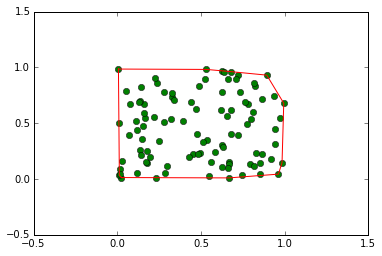

In [112]:
n = 100
x_coord = np.random.random([n])
y_coord = np.random.random([n])
# Make pairs
points = zip(x_coord,y_coord)

ch = (convex_hull(points))
# Divide list into separate tuples
ch_unzip= zip(*ch)

# Add a single element into tuple
ch_unzip[0]= ch_unzip[0] + (ch_unzip[0][0],)
ch_unzip[1]= ch_unzip[1]+ (ch_unzip[1][0],)

# Plot points and convex hull
plt.plot(x_coord, y_coord,'go')
plt.plot(ch_unzip[0],ch_unzip[1],'r')
plt.axis([-0.5, 1.5, -0.5, 1.5])
plt.show()

<h2>Package wrap or Jarvi's march algorithm</h2>


<ul>
<li>Start with point with smallest y-coordinate.</li>
<li>Rotate sweep line around current point in ccw direction.</li>
<li>First point hit is on the hull.</li>
<li>Repeat.</li>
</ul>


<h3>Implementation</h3>

<ul>
<li>Compute angle between current point and all remaining points.</li>
<li>Pick smallest angle larger than current angle.</li>
<li> $\Theta(n)$ per iteration.</li>
<ul>

<h3>Running Time Analysis</h3>




<h3>How many points on hull?</h3>

<ul>
<li>Worst case:  $h = ?$.</li>
<li>Average case:  difficult problems in stochastic geometry.
<ul>
<li>in a disc:  $h = N^{1/3}$.</li>
<li>in a convex polygon with $O(1)$ edges:  $h = \log n$.</li>
</ul>
</li>
</ul>

In [109]:
# Jarvis March O(nh) - Tom Switzer <thomas.switzer@gmail.com>
 
TURN_LEFT, TURN_RIGHT, TURN_NONE = (1, -1, 0)
 
def turn(p, q, r):
    """Returns -1, 0, 1 if p,q,r forms a right, straight, or left turn."""
    return cmp((q[0] - p[0])*(r[1] - p[1]) - (r[0] - p[0])*(q[1] - p[1]), 0)
 
def _dist(p, q):
    """Returns the squared Euclidean distance between p and q."""
    dx, dy = q[0] - p[0], q[1] - p[1]
    return dx * dx + dy * dy
 
def _next_hull_pt(points, p):
    """Returns the next point on the convex hull in CCW from p."""
    q = p
    for r in points:
        t = turn(p, q, r)
        if t == TURN_RIGHT or t == TURN_NONE and _dist(p, r) > _dist(p, q):
            q = r
    return q
 
def convexhull_jarvis_march(points):
    """Returns the points on the convex hull of points in CCW order."""
    hull = [min(points)]
    for p in hull:
        q = _next_hull_pt(points, p)
        if q != hull[0]:
            hull.append(q)
    return hull

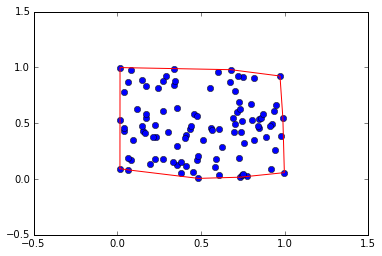

In [111]:
n = 100
x_coord = np.random.random([n])
y_coord = np.random.random([n])
# Make pairs
points = zip(x_coord,y_coord)

ch = (convexhull_jarvis_march(points))
# Divide list into separate tuples
ch_unzip= zip(*ch)

# Add a single element into tuple
ch_unzip[0]= ch_unzip[0] + (ch_unzip[0][0],)
ch_unzip[1]= ch_unzip[1]+ (ch_unzip[1][0],)

# Plot points and convex hull
plt.plot(x_coord, y_coord,'bo')
plt.plot(ch_unzip[0],ch_unzip[1],'r')
plt.axis([-0.5, 1.5, -0.5, 1.5])
plt.show()

Note: Clustering algorithms might be an interesting and advanced topic to review.

<h2>Find the closet pair of points</h2>

Given a set of euclidean points $Q$ we must find the closet pair of points.


<h3>Naive algorithm</h3>

Compaire the distance for each pair of point in $Q$

In [114]:
def closetpair_bf(Q):
    min_distance = float('Inf')    
    min_pair = None
    for i in Q:
        for j in Q:
            if length_segment(p1,p2) < min_distance:
                min_pair = [i, j]
    return min_pair

How can we do it better?

<h3>An divide-and-conquer algorithm</h3>

[Cormen]
<ul>
<li>Each recursive invocation of the algorithm takes as input a subset $P \subseteq Q$ and arrays $X$ and $Y$, each of which contains all the points of the input subset $P$. </li>
<li>The points in array $X$ are sorted so that their $x$-coordinates are monotonically increasing. </li>
<li>Similarly, array $Y$ is sorted by monotonically increasing $y$-coordinate.</li>
<li>If $|P|<3$
</ul>

<b>Divide:</b> 
<ul>
<li>Find a vertical line $l$ that bisects the point set $P$ into two sets $P_L$ and $P_R$ such that $|PL| = \lceil|P|/2\rceil$, $|P_R| = \lfloor|P|/2\rfloor$, all points in $P_L$ are on or to the left of line $l$, and all points in $P_R$ are on or to the right of $l$. </li>
<li>Divide the array $X$ into arrays $X_L$ and $X_R$ , which contain the points of $P_L$ and $P_R$ respectively, sorted by monotonically increasing $x$-coordinate. </li>
<li>Similarly, divide the array $Y$ into arrays $Y_L$ and $Y_R$ , which contain the points of $P_L$ and $P_R$ respectively, sorted by monotonically increasing $y$-coordinate.</li>
</ul>

<b>Conquer:</b> Having divided $P$ into $P_L$ and $P_R$, make two recursive calls, one to find
the closest pair of points in $P_L$ and the other to find the closest pair of points
in $P_R$ . The inputs to the first call are the subset $P_L$ and arrays $X_L$ and $Y_L$ ; the
second call receives the inputs $P_R$, $X_R$ , and $Y_R$ . Let the closest-pair distances
returned for $P_L$ and $P_R$ be $\delta_L$ and $\delta_R$, respectively, and let $\delta = \min\{\delta_L, \delta_R\}$.


<b>Combine:</b> The closest pair is either the pair with distance $\delta$ found by one of the recursive calls, or it is a pair of points with one point in $P_L$ and the other in $P_R$. The algorithm determines whether there is a pair with one point in $P_L$ and the other point in $P_R$ and whose distance is less than $\delta$. Observe that if a pair of
points has distance less than $\delta$, both points of the pair must be within $\delta$ units
of line $l$. To find such a pair, if one exists, we do the following:
<ol>
<li> Create an array $Y'$ , which is the array $Y$ with all points not in the $2\delta$-wide vertical strip removed. The array $Y'$ is sorted by $y$-coordinate, just as $Y$ is.</li>
<li>. For each point $p$ in the array $Y'$, try to find points in $Y'$ that are within $\delta$ units of $p$. As we shall see shortly, only the $12$ points in $Y'$ that follow $p$ need be considered. Compute the distance from $p$ to each of these 12 points, and keep track of the closest-pair distance $\delta'$ found over all pairs of points in $Y'$.
<li> If $\delta' < \delta$, then the vertical strip does indeed contain a closer pair than the recursive calls found. Return this pair and its distance $\delta'$ . Otherwise, return the closest pair and its distance $\delta$ found by the recursive calls.
</ol>

Note: Apply for 7 instead of 12

<h2>Voronoi Diagrams</h2>

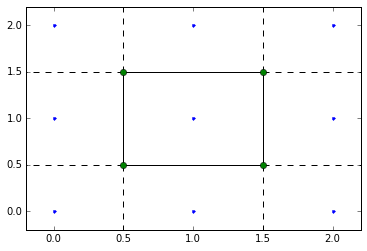

In [118]:
from scipy.spatial import Voronoi, voronoi_plot_2d

points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],[2, 0], [2, 1], [2, 2]])

vor = Voronoi(points)
voronoi_plot_2d(vor)
plt.show()

<a https://upload.wikimedia.org/wikipedia/commons/0/0c/Fortunes-algorithm-slowed.gif>Fortune algorithm</a>

Assignment


1. Implement an divide-and-coquer algorithm which run in time $O(n\lg n)$
2. Research about algorithms to compute Voronoi diagrams. Describe and discuss the algorithms reviewed.

###Coloring a Voronoi diagram

<h1>References</h1>

https://www.cs.princeton.edu/~rs/AlgsDS07/16Geometric.pdf

http://blancosilva.github.io/post/2014/10/28/Computational-Geometry-in-Python.html

http://people.inf.elte.hu/fekete/algoritmusok_msc/terinfo_geom/konyvek/Computational%20Geometry%20-%20Algorithms%20and%20Applications,%203rd%20Ed.pdf